# Obtaining and Exploring a Real-World Corpus

In industry, you almost never start with a perfectly curated list of documents.
You start by:

- locating an existing corpus

- understanding its scope and structure

- checking what it contains and what it does not

- inspecting it before deciding how to preprocess it

https://stateoftheunion.onetwothree.net/

https://www.kaggle.com/datasets/nltkdata/state-union-corpus

## Loading a Real Corpus (State of the Union)

NLTK includes a built-in corpus of all U.S. State of the Union addresses spanning more than two centuries.

In [1]:
# Import libraries
import nltk
from nltk.corpus import state_union
# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download("punkt_tab")


[nltk_data] Downloading package punkt to /Users/arad/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /Users/arad/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /Users/arad/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
nltk.download('state_union')

[nltk_data] Downloading package state_union to
[nltk_data]     /Users/arad/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.


True

In [3]:
state_union.fileids()[:10]

['1945-Truman.txt',
 '1946-Truman.txt',
 '1947-Truman.txt',
 '1948-Truman.txt',
 '1949-Truman.txt',
 '1950-Truman.txt',
 '1951-Truman.txt',
 '1953-Eisenhower.txt',
 '1954-Eisenhower.txt',
 '1955-Eisenhower.txt']

- Each file corresponds to one speech, typically named by year and president.
- Each file is a document.
- The full collection is a corpus.

## Understanding Corpus Scope

In [6]:
num_docs = len(state_union.fileids())
num_words = len(state_union.words())

print("Document count:", num_docs, "Word Count:", num_words)

Document count: 65 Word Count: 399822


- This corpus spans over 200 years of political language.
- This makes it suitable for temporal, historical, and policy trend analysis.

# Inspecting Raw Text (No Processing Yet)
Before tokenization, normalization, or cleaning, we inspect the raw text.

In [11]:
sample_file = state_union.fileids()[0]
raw_text = state_union.raw(sample_file)
print(raw_text[:100])

PRESIDENT HARRY S. TRUMAN'S ADDRESS BEFORE A JOINT SESSION OF THE CONGRESS
 
April 16, 1945

Mr. Spe


- Is this clean or messy text?

- Do you see formatting artifacts?

- Would you need domain-specific cleaning?

In [8]:
# Inspect the first 500 words of the 1945 Truman address
truman_1945_words = state_union.words('1945-Truman.txt')[:500]
#truman_1945_text = ' '.join(truman_1945_words)  # Join words into a single string

In [9]:
truman_1945_words

['PRESIDENT',
 'HARRY',
 'S',
 '.',
 'TRUMAN',
 "'",
 'S',
 'ADDRESS',
 'BEFORE',
 'A',
 'JOINT',
 'SESSION',
 'OF',
 'THE',
 'CONGRESS',
 'April',
 '16',
 ',',
 '1945',
 'Mr',
 '.',
 'Speaker',
 ',',
 'Mr',
 '.',
 'President',
 ',',
 'Members',
 'of',
 'the',
 'Congress',
 ':',
 'It',
 'is',
 'with',
 'a',
 'heavy',
 'heart',
 'that',
 'I',
 'stand',
 'before',
 'you',
 ',',
 'my',
 'friends',
 'and',
 'colleagues',
 ',',
 'in',
 'the',
 'Congress',
 'of',
 'the',
 'United',
 'States',
 '.',
 'Only',
 'yesterday',
 ',',
 'we',
 'laid',
 'to',
 'rest',
 'the',
 'mortal',
 'remains',
 'of',
 'our',
 'beloved',
 'President',
 ',',
 'Franklin',
 'Delano',
 'Roosevelt',
 '.',
 'At',
 'a',
 'time',
 'like',
 'this',
 ',',
 'words',
 'are',
 'inadequate',
 '.',
 'The',
 'most',
 'eloquent',
 'tribute',
 'would',
 'be',
 'a',
 'reverent',
 'silence',
 '.',
 'Yet',
 ',',
 'in',
 'this',
 'decisive',
 'hour',
 ',',
 'when',
 'world',
 'events',
 'are',
 'moving',
 'so',
 'rapidly',
 ',',
 'our'

# Words vs Sentences vs Characters?
At this stage, we only explore structure.

In [13]:
num_char = len(raw_text)
num_words = len(state_union.words(sample_file))
num_sentences = len(state_union.sents(sample_file))

print("Character count:", num_char, "Word count:", num_words, "Sentence count:", num_sentences)

Character count: 10914 Word count: 2138 Sentence count: 116


In [16]:
from nltk.tokenize import sent_tokenize, word_tokenize
tokens_nltk = word_tokenize(raw_text)
tokens_nltk

['PRESIDENT',
 'HARRY',
 'S.',
 'TRUMAN',
 "'S",
 'ADDRESS',
 'BEFORE',
 'A',
 'JOINT',
 'SESSION',
 'OF',
 'THE',
 'CONGRESS',
 'April',
 '16',
 ',',
 '1945',
 'Mr.',
 'Speaker',
 ',',
 'Mr.',
 'President',
 ',',
 'Members',
 'of',
 'the',
 'Congress',
 ':',
 'It',
 'is',
 'with',
 'a',
 'heavy',
 'heart',
 'that',
 'I',
 'stand',
 'before',
 'you',
 ',',
 'my',
 'friends',
 'and',
 'colleagues',
 ',',
 'in',
 'the',
 'Congress',
 'of',
 'the',
 'United',
 'States',
 '.',
 'Only',
 'yesterday',
 ',',
 'we',
 'laid',
 'to',
 'rest',
 'the',
 'mortal',
 'remains',
 'of',
 'our',
 'beloved',
 'President',
 ',',
 'Franklin',
 'Delano',
 'Roosevelt',
 '.',
 'At',
 'a',
 'time',
 'like',
 'this',
 ',',
 'words',
 'are',
 'inadequate',
 '.',
 'The',
 'most',
 'eloquent',
 'tribute',
 'would',
 'be',
 'a',
 'reverent',
 'silence',
 '.',
 'Yet',
 ',',
 'in',
 'this',
 'decisive',
 'hour',
 ',',
 'when',
 'world',
 'events',
 'are',
 'moving',
 'so',
 'rapidly',
 ',',
 'our',
 'silence',
 'migh

In [17]:
sent_ntlk = sent_tokenize(raw_text)
sent_ntlk[:5]

["PRESIDENT HARRY S. TRUMAN'S ADDRESS BEFORE A JOINT SESSION OF THE CONGRESS\n \nApril 16, 1945\n\nMr. Speaker, Mr. President, Members of the Congress:\nIt is with a heavy heart that I stand before you, my friends and colleagues, in the Congress of the United States.",
 'Only yesterday, we laid to rest the mortal remains of our beloved President, Franklin Delano Roosevelt.',
 'At a time like this, words are inadequate.',
 'The most eloquent tribute would be a reverent silence.',
 'Yet, in this decisive hour, when world events are moving so rapidly, our silence might be misunderstood and might give comfort to our enemies.']

# Quick Corpus-Wide Exploration

In [18]:
d = {}

for fileid in state_union.fileids():
    num_words = len(state_union.words(fileid))
    d[fileid] = num_words
d

{'1945-Truman.txt': 2138,
 '1946-Truman.txt': 30650,
 '1947-Truman.txt': 6740,
 '1948-Truman.txt': 5705,
 '1949-Truman.txt': 3817,
 '1950-Truman.txt': 5673,
 '1951-Truman.txt': 4514,
 '1953-Eisenhower.txt': 7777,
 '1954-Eisenhower.txt': 6774,
 '1955-Eisenhower.txt': 8200,
 '1956-Eisenhower.txt': 9190,
 '1957-Eisenhower.txt': 4633,
 '1958-Eisenhower.txt': 5589,
 '1959-Eisenhower.txt': 5607,
 '1960-Eisenhower.txt': 6311,
 '1961-Kennedy.txt': 6634,
 '1962-Kennedy.txt': 7603,
 '1963-Johnson.txt': 1878,
 '1963-Kennedy.txt': 6218,
 '1964-Johnson.txt': 3675,
 '1965-Johnson-1.txt': 4966,
 '1965-Johnson-2.txt': 4192,
 '1966-Johnson.txt': 6253,
 '1967-Johnson.txt': 8221,
 '1968-Johnson.txt': 5689,
 '1969-Johnson.txt': 4660,
 '1970-Nixon.txt': 5019,
 '1971-Nixon.txt': 4558,
 '1972-Nixon.txt': 4512,
 '1973-Nixon.txt': 1873,
 '1974-Nixon.txt': 5805,
 '1975-Ford.txt': 4760,
 '1976-Ford.txt': 5617,
 '1977-Ford.txt': 5342,
 '1978-Carter.txt': 5238,
 '1979-Carter.txt': 3764,
 '1980-Carter.txt': 3871,
 

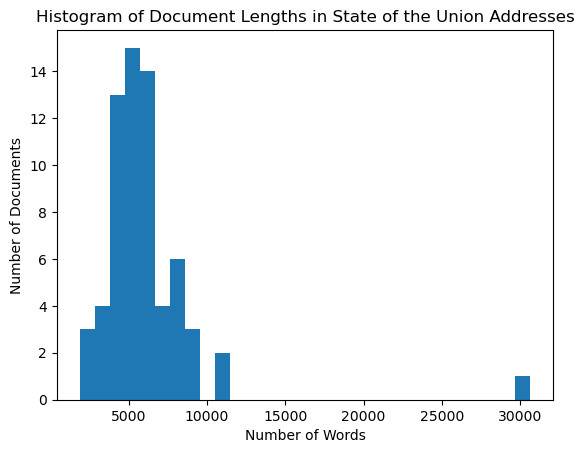

In [ ]:
import matplotlib.pyplot as plt
plt.hist(d.values(), bins=30)
plt.xlabel('Number of Words')
plt.ylabel('Number of Documents')
plt.title('Histogram of Document Lengths in State of the Union Addresses')
plt.show()


In the next section, we will treat each State of the Union address as a document and the full collection as a corpus. We will begin designing preprocessing pipelines using both NLTK and spaCy, and we will compare how each library handles the same steps.